In [46]:
# https://www.youtube.com/watch?v=wu9IH1Xvdd4&list=PLzMcBGfZo4-lak7tiFDec5_ZMItiIIfmj&index=2

In [47]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

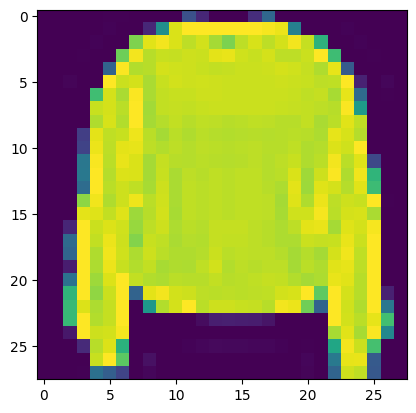

In [48]:
plt.imshow(train_images[7])
plt.show()

In [49]:
# Video 3

In [50]:
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)),
	keras.layers.Dense(128, activation="relu"),
	keras.layers.Dense(10, activation="softmax")
	])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4932 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3728 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3354 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8844
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8697

Test accuracy: 0.869700014591217


In [51]:
# Video 4 to predict

313/313 [==============================] - 1s 2ms/step


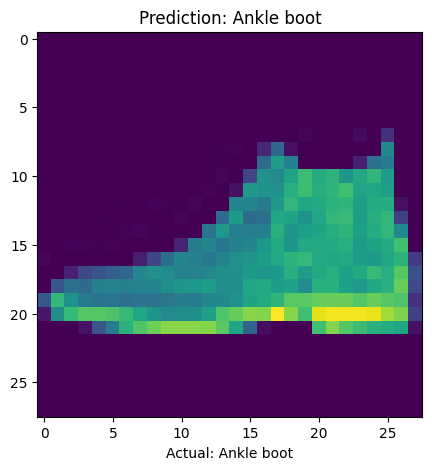

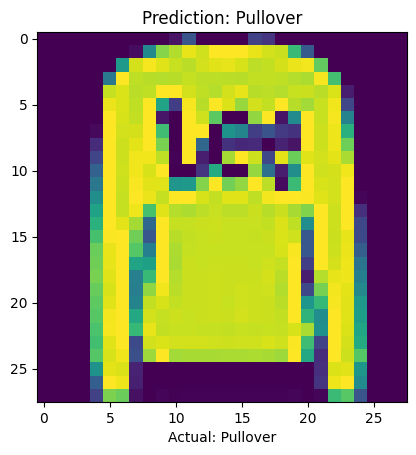

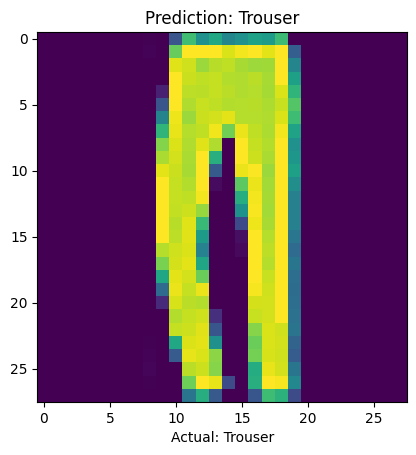

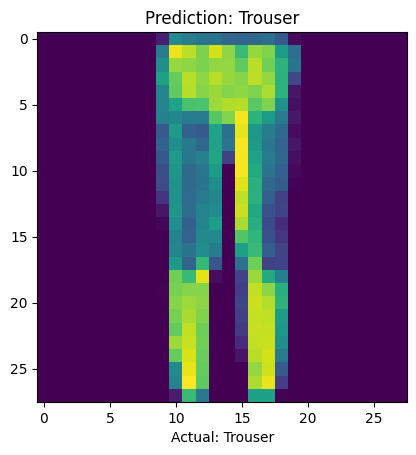

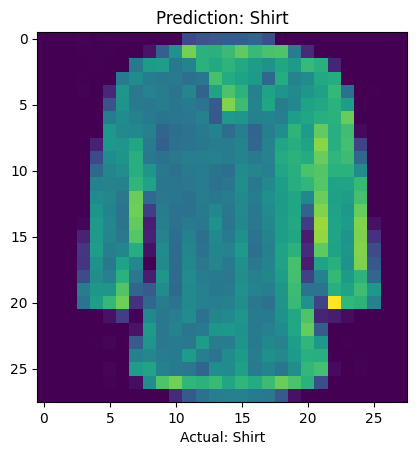

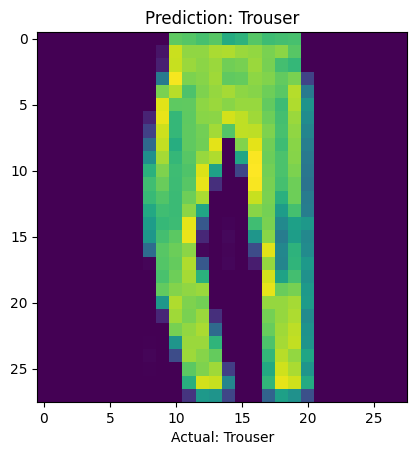

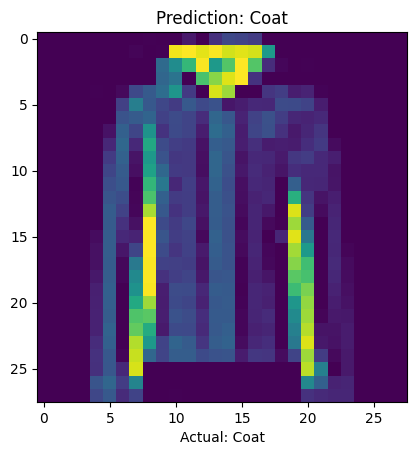

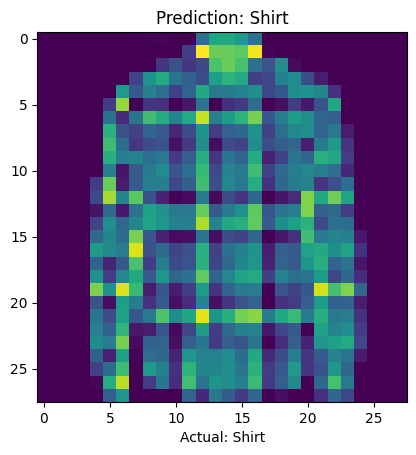

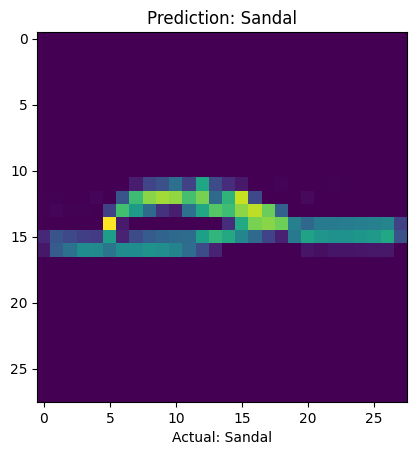

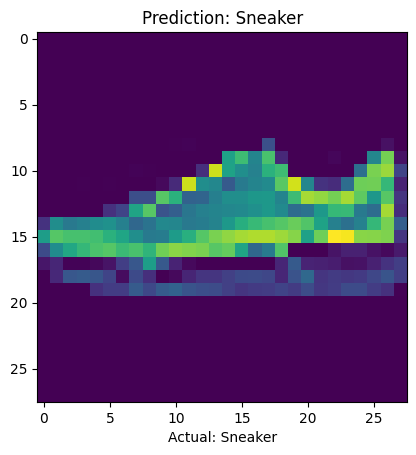

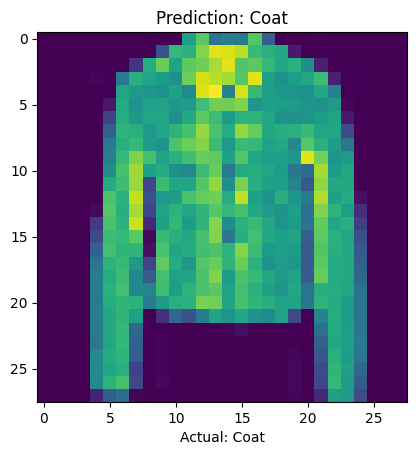

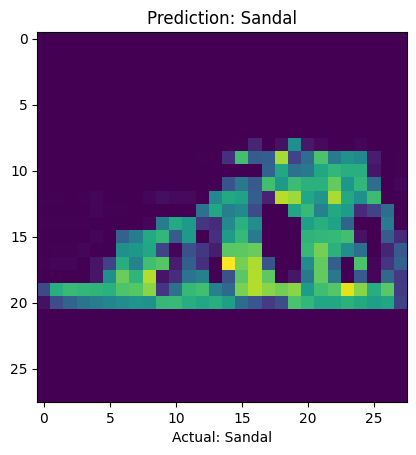

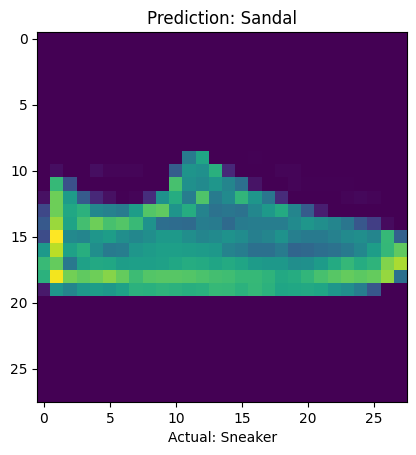

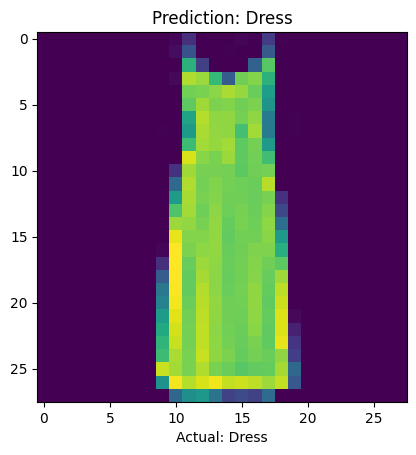

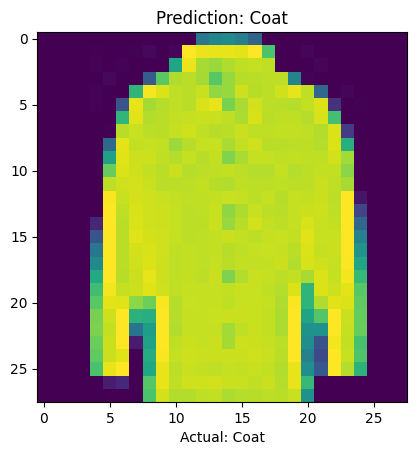

In [52]:
predictions = model.predict(test_images)
plt.figure(figsize=(5,5))
for i in range(15):
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(predictions[i])])
    plt.show()

In [53]:
# Video 5 Movie Reviews

In [54]:
import tensorflow as td
from tensorflow import keras
import numpy as np

data = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=88000)


word_index = data.get_word_index() 

word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


def decode_review(text):
	return " ".join([reverse_word_index.get(i, "?") for i in text])

print(decode_review(test_data[0]))

#print(len(test_data[0]),len(test_data[1]))


<START> please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss


In [55]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

#print(len(test_data[0]),len(test_data[1]))

model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()  # prints a summary of the model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_7   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Video 7 P3

In [57]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

In [59]:
fitModel = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_10/embedding_7/embedding_lookup' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Daddy\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Daddy\AppData\Local\Temp\ipykernel_8540\2251809549.py", line 1, in <module>
      fitModel = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), verbose=1)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\core\embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_10/embedding_7/embedding_lookup'
indices[481,2] = 22838 is not in [0, 10000)
	 [[{{node sequential_10/embedding_7/embedding_lookup}}]] [Op:__inference_train_function_166633]

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 2s 3ms/step - loss: 0.3278 - accuracy: 0.8733
[0.32782381772994995, 0.8732799887657166]


In [ ]:
test_review = test_data[0]
predict = model.predict([test_review])
print("Review: ")
print(decode_review(test_review))
#print("Prediction: " + str(predict[0]))
print("Actual: " + str(test_labels[0]))

ValueError: in user code:

    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Daddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "global_average_pooling1d_5" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 16)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=('tf.Tensor(shape=(None,), dtype=int32)',)
      • training=False
      • mask=None
